In [1]:
# pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [12]:
import os
import time
import uuid
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import json
import numpy as np

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [11]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [14]:
images.as_numpy_iterator().next()

b'data\\images\\53eae948-a3e7-11ed-9b74-48ba4e89b37b.jpg'

In [15]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [16]:
images = images.map(load_image)

In [17]:
images.as_numpy_iterator().next()

array([[[167, 178, 172],
        [169, 180, 174],
        [171, 182, 176],
        ...,
        [118, 119, 121],
        [116, 120, 123],
        [117, 121, 124]],

       [[164, 175, 169],
        [166, 177, 171],
        [168, 179, 173],
        ...,
        [115, 119, 120],
        [115, 119, 120],
        [115, 119, 120]],

       [[165, 176, 168],
        [166, 177, 169],
        [167, 178, 170],
        ...,
        [114, 120, 118],
        [114, 120, 118],
        [114, 120, 118]],

       ...,

       [[ 36,  26,  17],
        [ 37,  27,  18],
        [ 37,  27,  18],
        ...,
        [146, 118, 107],
        [144, 116, 105],
        [144, 116, 104]],

       [[ 36,  27,  18],
        [ 36,  27,  18],
        [ 36,  28,  17],
        ...,
        [145, 118, 109],
        [145, 118, 109],
        [148, 121, 110]],

       [[ 37,  28,  19],
        [ 36,  27,  18],
        [ 36,  28,  17],
        ...,
        [145, 120, 113],
        [146, 119, 110],
        [145, 118, 109]]

In [18]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [19]:
image_generator = images.batch(4).as_numpy_iterator()

In [20]:
plot_images = image_generator.next()

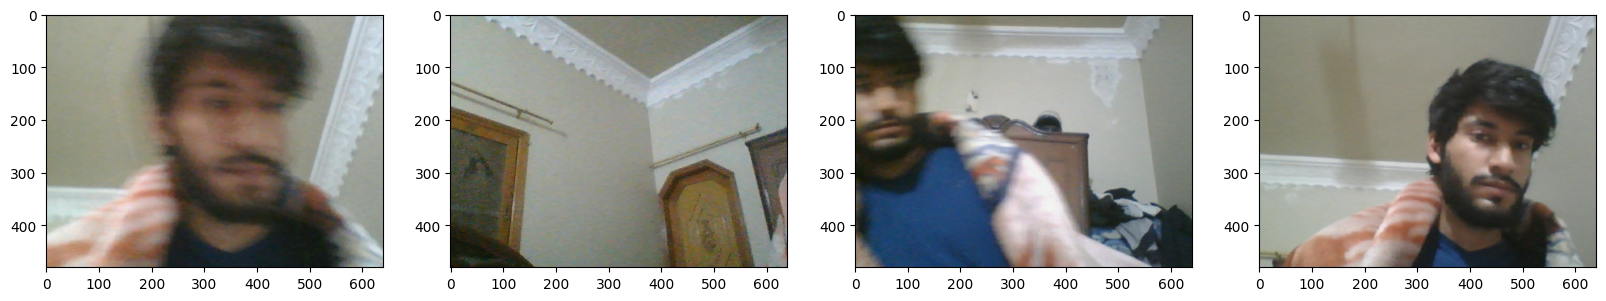

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()